In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns   
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


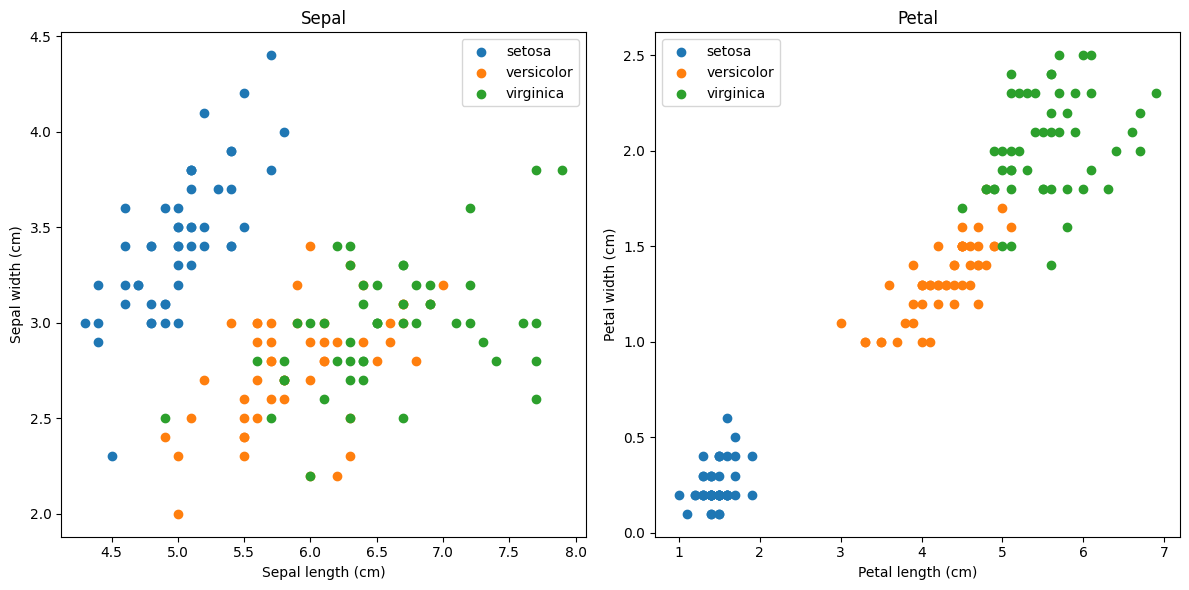

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
for t in np.unique(df['target']):
    plt.scatter(df[df['target'] == t]['sepal length (cm)'], df[df['target'] == t]['sepal width (cm)'], label=iris.target_names[t])
plt.title('Sepal')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

plt.subplot(1, 2, 2)
for t in np.unique(df['target']):
    plt.scatter(df[df['target'] == t]['petal length (cm)'], df[df['target'] == t]['petal width (cm)'], label=iris.target_names[t])
plt.title('Petal')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

plt.tight_layout()

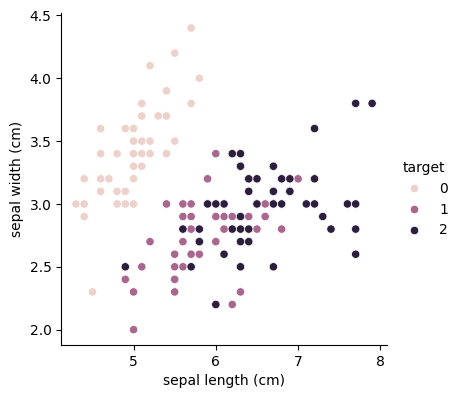

In [7]:
sns.pairplot(data=df, x_vars="sepal length (cm)", y_vars="sepal width (cm)", hue="target", height=4)

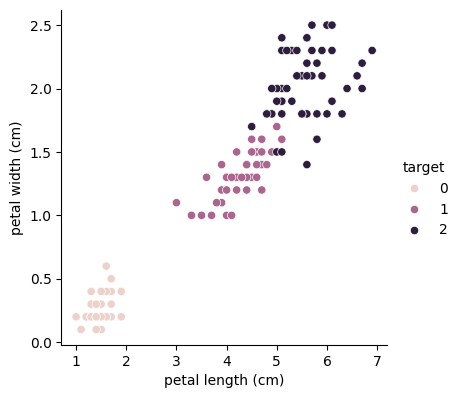

In [8]:
sns.pairplot(data=df, x_vars="petal length (cm)", y_vars="petal width (cm)", hue="target", height=4)

In [10]:
df1 = df[df["target"] != 2]
df2 = df[df["target"] != 0]

In [11]:
from sklearn.model_selection import train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split(df1.iloc[:, :-1], df1['target'], test_size=0.3, stratify=df1["target"])
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.iloc[:, :-1], df2['target'], test_size=0.3, stratify=df2["target"])

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [13]:
from sklearn.metrics import accuracy_score
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
print("Точность:", accuracy_score(y1_test, y1_pred))

Точность: 1.0


In [14]:
clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)
print("Точность:", accuracy_score(y2_test, y2_pred))

Точность: 0.9666666666666667


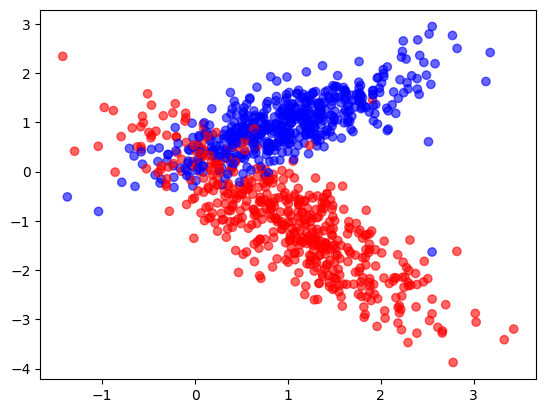

In [18]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_informative=2,random_state=1, n_clusters_per_class=1)

plt.scatter(X.T[0], X.T[1], c=y, cmap="bwr", alpha=0.6)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred))

Точность: 0.88
